# Confidence Intervals

---

## a) Using Bootstrapping Approach:

In [6]:
# First load in all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [3]:
coffee_red.groupby(by = 'drinks_coffee').size() / coffee_red.shape[0]

drinks_coffee
False    0.405
True     0.595
dtype: float64

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [3]:
coffee_red[coffee_red['drinks_coffee'] == True]['height'].mean()

68.119629908586163

In [4]:
coffee_red[coffee_red['drinks_coffee'] == False]['height'].mean()

66.784922799278775

`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [4]:
coffee_new = coffee_red.sample(200, replace = True)

In [5]:
coffee_new.groupby(by = 'drinks_coffee').size() / coffee_new.shape[0]

drinks_coffee
False    0.395
True     0.605
dtype: float64

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

In [8]:
boot_means = []
for n in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    bootsample_mean = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
    boot_means.append(bootsample_mean)
boot_means = np.array(boot_means)

In [19]:
boot_means

array([ 66.16303955,  66.62306672,  66.2211495 , ...,  67.11971332,
        67.33699215,  67.12701562])

In [20]:
boot_means.mean()

66.78744683795783

In [22]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(66.000661228831547, 67.589949884098743)

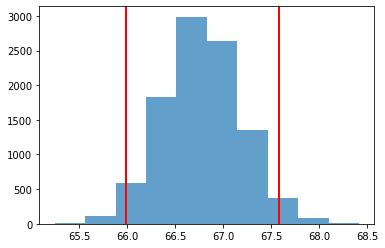

In [19]:
plt.hist(boot_means, alpha=0.7);
plt.axvline(np.percentile(boot_means, 2.5), color='red', linewidth=2) ;
plt.axvline(np.percentile(boot_means, 97.5), color='red', linewidth=2) ;

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [11]:
coffee_full.query('drinks_coffee == False')['height'].mean()

66.44340776214705

---

## b) Using Built-in Methods : T-Test 

In [13]:
import statsmodels.stats.api as sm


In [16]:
X1 = coffee_red[coffee_red['drinks_coffee']==True]['height'] 
X2 = coffee_red[coffee_red['drinks_coffee']==False]['height']

cm = sm.CompareMeans(sm.DescrStatsW(X1), sm.DescrStatsW(X2))

print (cm.tconfint_diff(usevar='unequal'))

(0.39600106159185644, 2.273413157022891)


In [18]:
cm.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,1.3347,0.448,2.977,0.003,0.451,2.219
